In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [5]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [2]:
df = pd.read_csv("5G_bw.csv")
df.head()

,time,signal,rx bitrate,tx bitrate,mcs_number_rx,mcs_number_tx,bandwidth_tx,bandwidth_rx,connections,bitrate1 5G,bitrate2 5G
0,0.000000,-37dBm,1.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,1.0,4,173.6,4.8
1,1.063121,-46dBm,1.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,1.0,4,173.6,4.8
2,1.068273,-47dBm,1.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,1.0,4,173.6,4.8
3,1.090768,-47dBm,2.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,2.0,4,173.6,4.8
4,1.098285,-46dBm,2.0_MBit/s_______,144.4_MBit/s_MCS_15_short_GI___,NaN,15,144.4,2.0,4,173.6,4.8


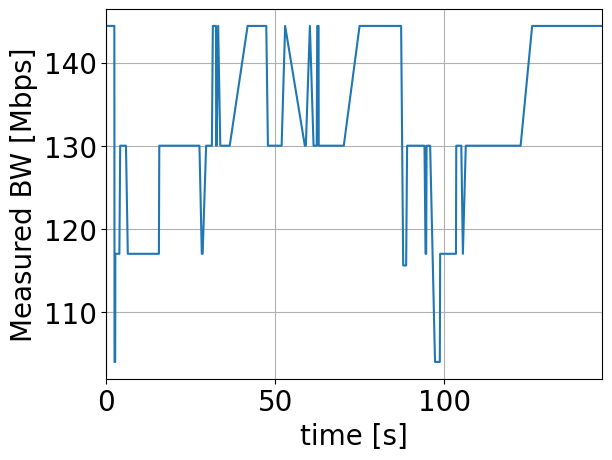

In [7]:
plt.figure()

plt.plot(df["time"],df["bandwidth_tx"])
plt.xlabel("time [s]")
plt.grid()
plt.ylabel("Measured BW [Mbps]")
plt.autoscale(axis="x",tight=True)

In [8]:
griddata(df["time"],df["bandwidth_tx"], 10, method='nearest')

array(117.)

In [11]:
tx_bw = []
t = []

for i in range(150):
    temp=(i+1)
    tx_bw.append(griddata(df["time"],df["bandwidth_tx"], temp, method='nearest')/10-5)
    t.append(temp)

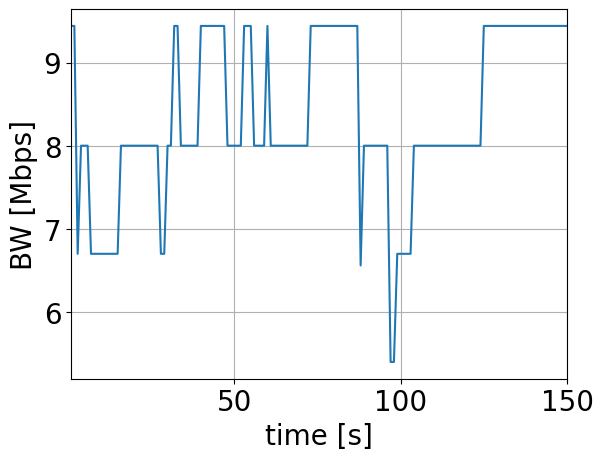

In [13]:
plt.figure()
plt.plot(t,tx_bw)
plt.xlabel("time [s]")
plt.grid()
plt.ylabel("BW [Mbps]")
plt.autoscale(axis="x",tight=True)